<a href="https://colab.research.google.com/github/aakhterov/ML_tools/blob/master/matplotlib_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Matplotlib training

<b>Target</b>: brush up on using the matplotlib library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib
from packaging import version
if version.parse(matplotlib.__version__) <= version.parse('3.4'):
    print('='*10 + ' Please, upgrade matplotlib ' + '='*10)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
plt.rcParams['font.size']=16
# plt.style.use("seaborn-whitegrid")

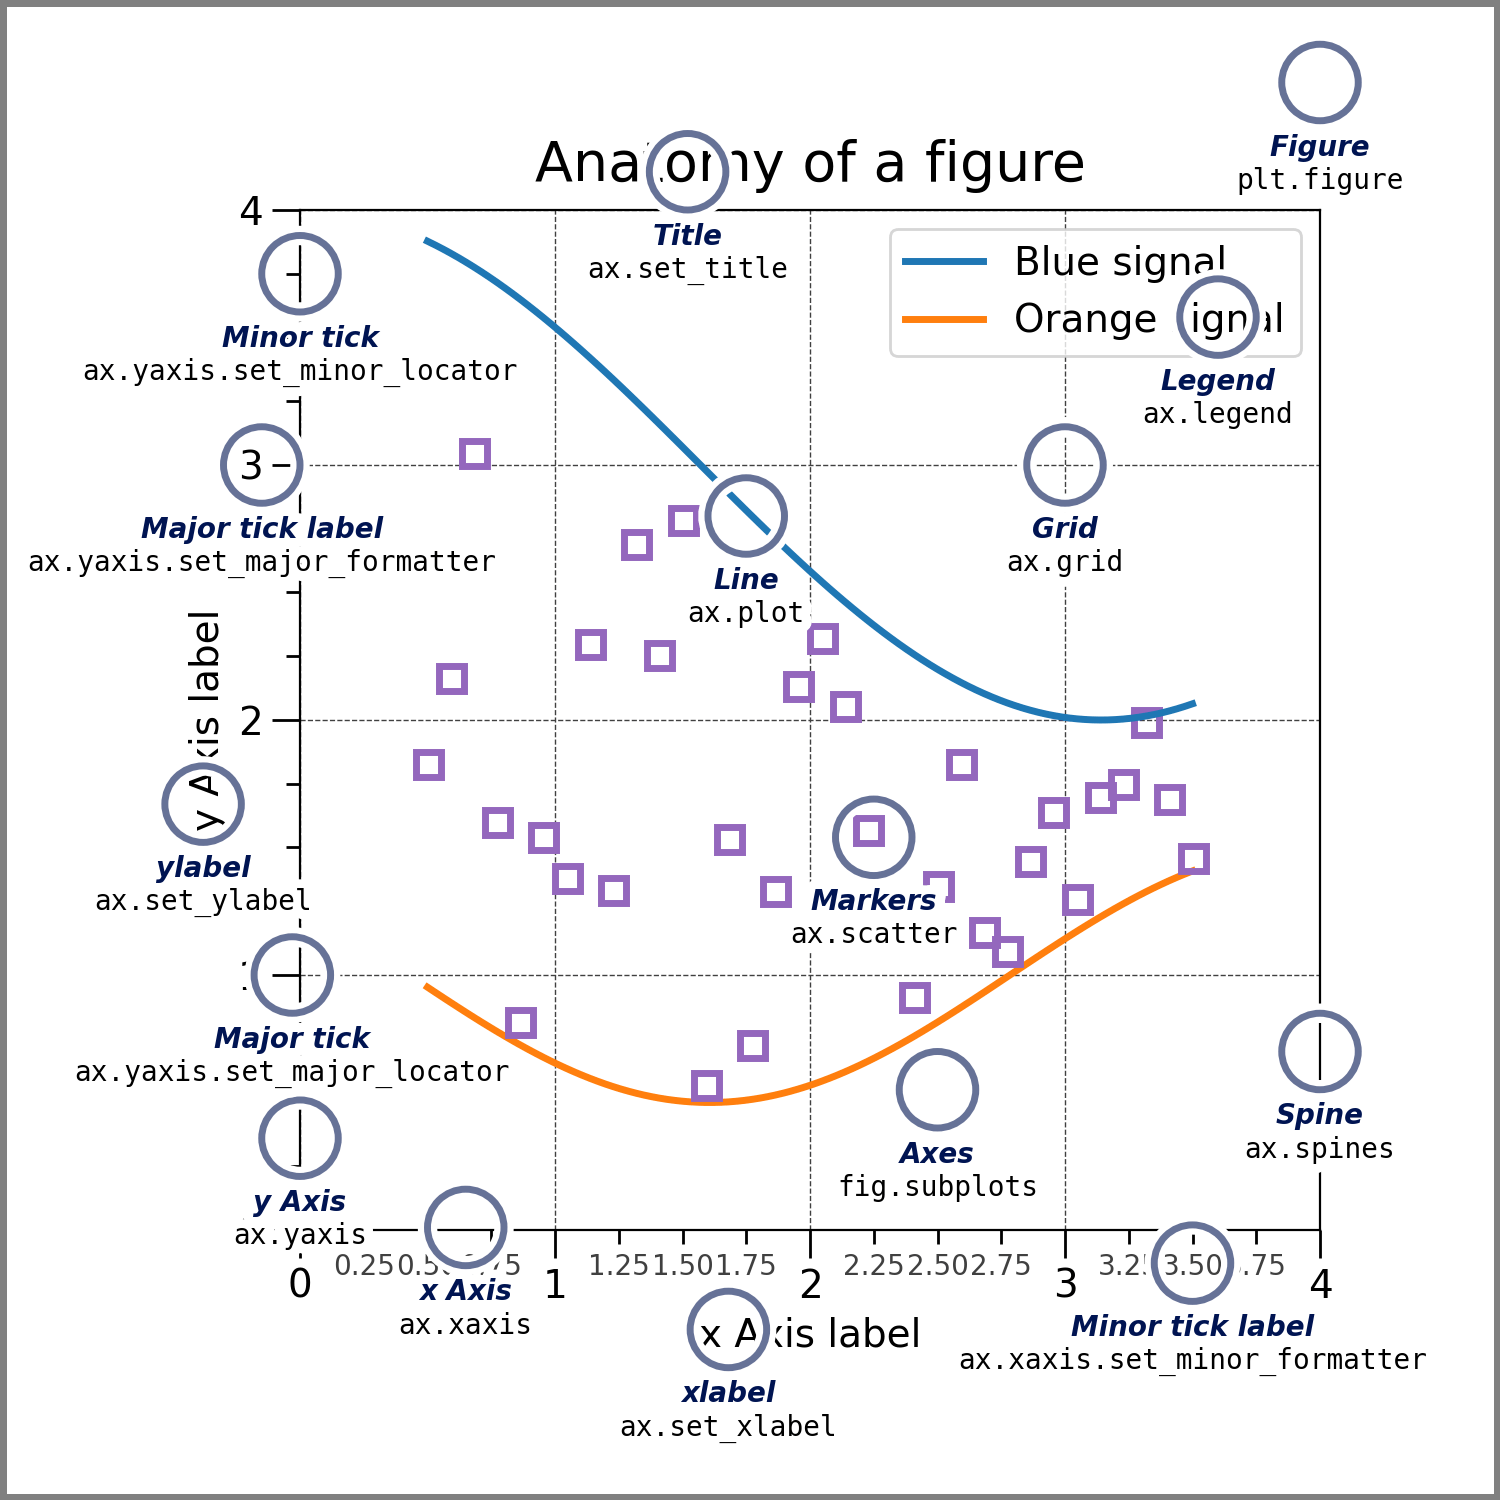

### Load data

In [4]:
iris = datasets.load_iris()
data, target, target_names, feature_names = iris["data"], iris["target"], iris["target_names"], iris["feature_names"]

### First look at the data

In [5]:
print(f"Data shape: {data.shape}. \n \
Data examples: {data[:2]}. \n \
Target shape: {target.shape}. \n \
Target examples: {target[:2]}. \n \
Target names: {target_names}. \n \
Feature names: {feature_names}")

Data shape: (150, 4). 
 Data examples: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]. 
 Target shape: (150,). 
 Target examples: [0 0]. 
 Target names: ['setosa' 'versicolor' 'virginica']. 
 Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Scatter plots

In [6]:
def plot_scatter(ax, x, y, plot_params={}, axis_params={}):
    ax.scatter(x, y, **plot_params)
    ax.set(**axis_params)

In [7]:
def plot_iris_data_scatter(ax, x, y, color='blue', marker='o', xlabel='', ylabel='', title='', plot_params={}, axis_params={}):
       plot_scatter(ax=ax, x=x, y=y,
            plot_params=dict({'s': 90, 'c': color, 'marker': marker}, **plot_params),
            axis_params=dict({'xlabel': xlabel, 'ylabel': ylabel, 'title': title}, **axis_params))

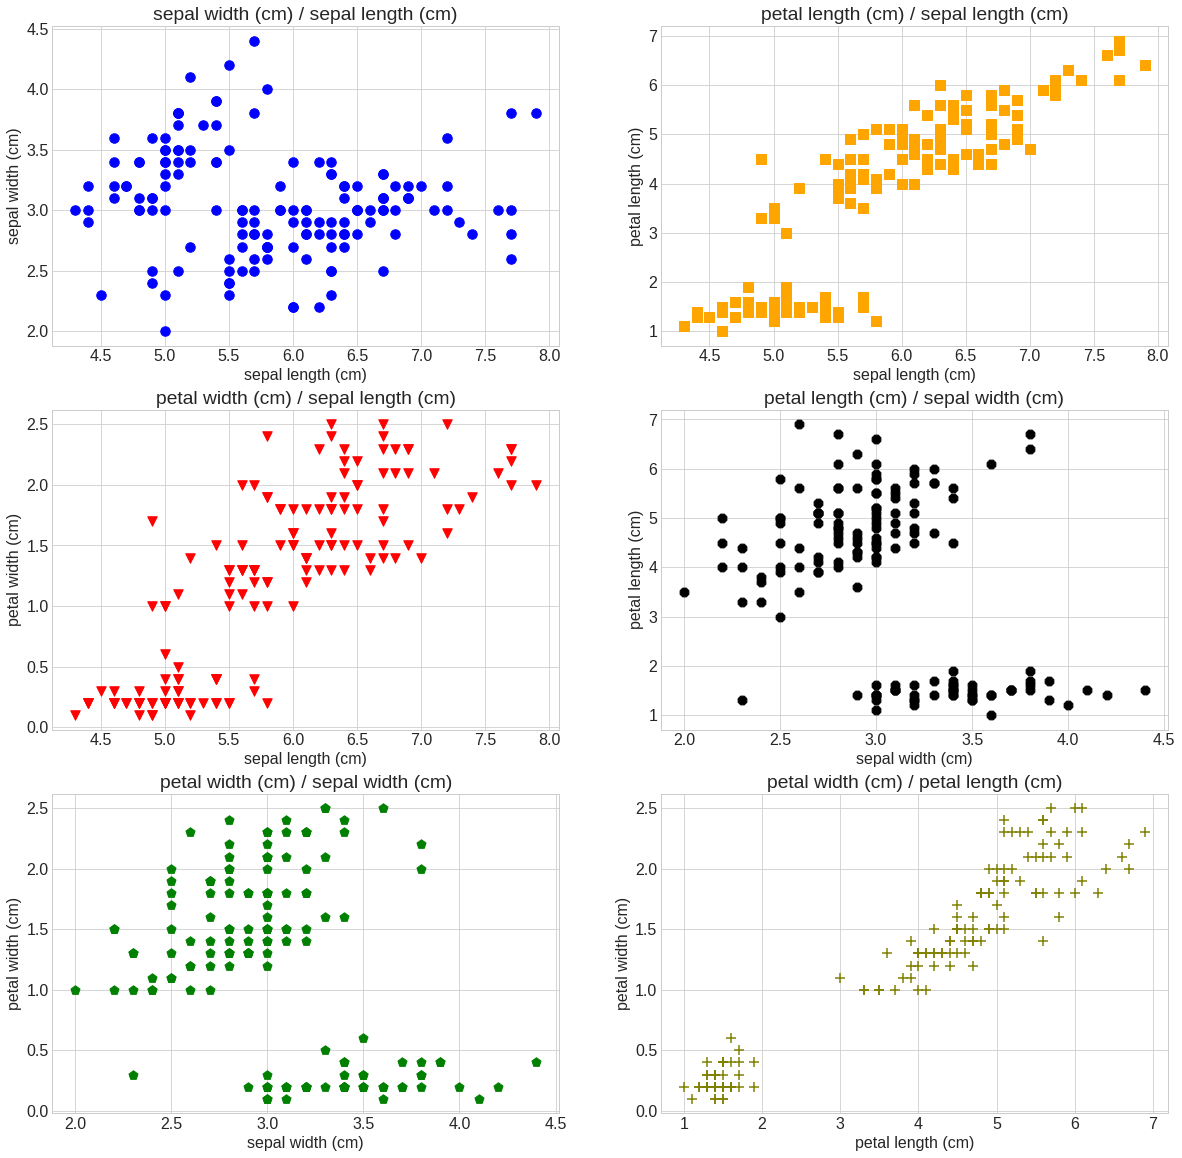

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20,20), constrained_layout=False)
plot_iris_data_scatter(axs[0,0], x=data[:,0], y=data[:,1],
                       color='blue', marker='o', xlabel=feature_names[0], ylabel=feature_names[1],
                       title=f"{feature_names[1]} / {feature_names[0]}")
plot_iris_data_scatter(axs[0,1], x=data[:,0], y=data[:,2],
                       color='orange', marker='s', xlabel=feature_names[0], ylabel=feature_names[2],
                       title=f"{feature_names[2]} / {feature_names[0]}")
plot_iris_data_scatter(axs[1,0], x=data[:,0], y=data[:,3],
                       color='red', marker='v', xlabel=feature_names[0], ylabel=feature_names[3],
                       title=f"{feature_names[3]} / {feature_names[0]}")
plot_iris_data_scatter(axs[1,1], x=data[:,1], y=data[:,2],
                       color='black', marker='8', xlabel=feature_names[1], ylabel=feature_names[2],
                       title=f"{feature_names[2]} / {feature_names[1]}")
plot_iris_data_scatter(axs[2,0], x=data[:,1], y=data[:,3],
                       color='green', marker='p', xlabel=feature_names[1], ylabel=feature_names[3],
                       title=f"{feature_names[3]} / {feature_names[1]}")
plot_iris_data_scatter(axs[2,1], x=data[:,2], y=data[:,3],
                       color='olive', marker='+', xlabel=feature_names[2], ylabel=feature_names[3],
                       title=f"{feature_names[3]} / {feature_names[2]}")



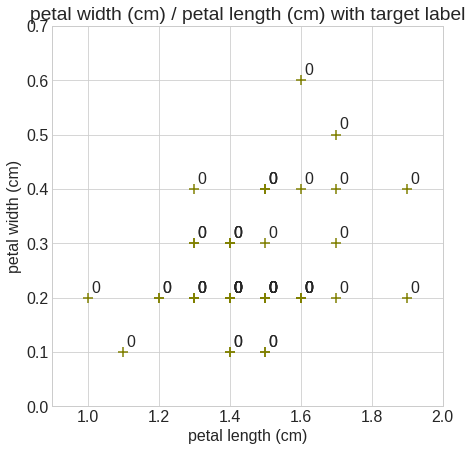

In [ ]:
fig, ax = plt.subplots(figsize=(7,7), constrained_layout=False)
x_min = 0.9
x_max = 2
y_min = 0
y_max = 0.7
plot_iris_data_scatter(ax, x=data[:,2], y=data[:,3],
                       color='olive', marker='+', xlabel=feature_names[2], ylabel=feature_names[3],
                       title=f"{feature_names[3]} / {feature_names[2]} with target label",
                       axis_params={"xlim": (x_min, x_max), "ylim": (y_min, y_max)})
for idx, x in enumerate(data[:,2]):
    if x_min <= x <= x_max:
        ax.annotate(text=target[idx], xy=(x, data[idx,3]), xytext=(x+0.01, data[idx,3]+0.01))

### Hist plots

[Text(0.5, 0, 'petal width (cm)'), Text(0.5, 1.0, 'Histogram of petal width')]

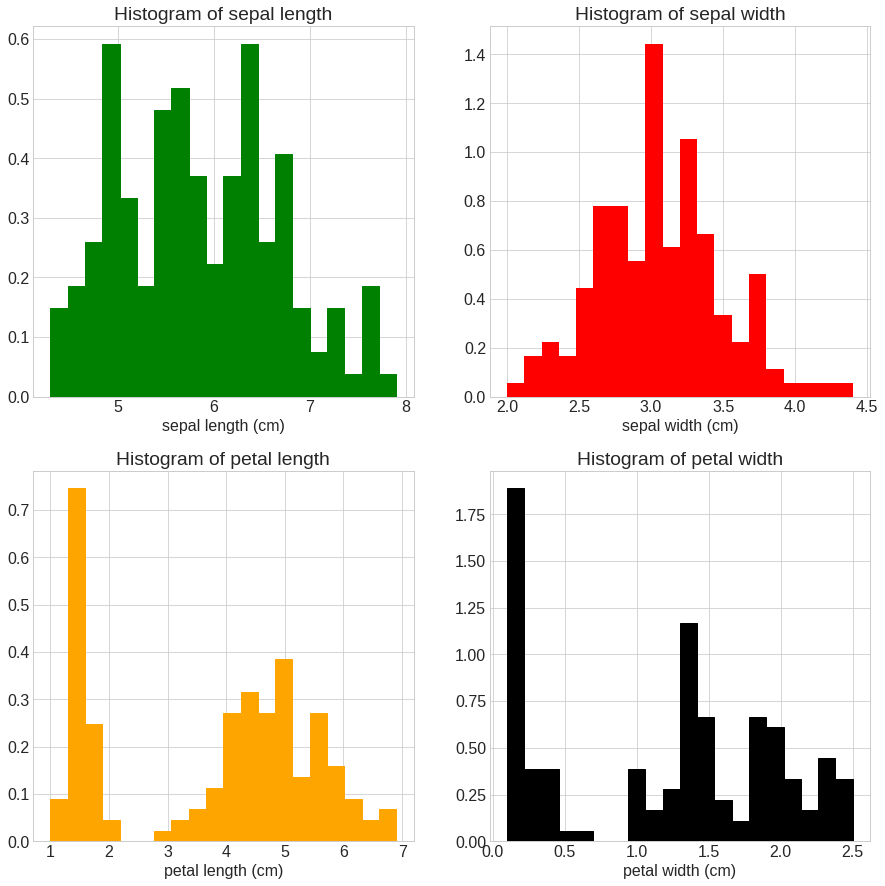

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
axs[0,0].hist(data[:,0], bins=20, density=True, color="green", edgecolor = "green")
axs[0,0].set(xlabel=feature_names[0], title=f"Histogram of {feature_names[0][:-5]}")
axs[0,1].hist(data[:,1], bins=20, density=True, color="red")
axs[0,1].set(xlabel=feature_names[1], title=f"Histogram of {feature_names[1][:-5]}")
axs[1,0].hist(data[:,2], bins=20, density=True, color="orange", edgecolor = "orange")
axs[1,0].set(xlabel=feature_names[2], title=f"Histogram of {feature_names[2][:-5]}")
axs[1,1].hist(data[:,3], bins=20, density=True, color="black", edgecolor = "black")
axs[1,1].set(xlabel=feature_names[3], title=f"Histogram of {feature_names[3][:-5]}")

### Scatter + Hist plot

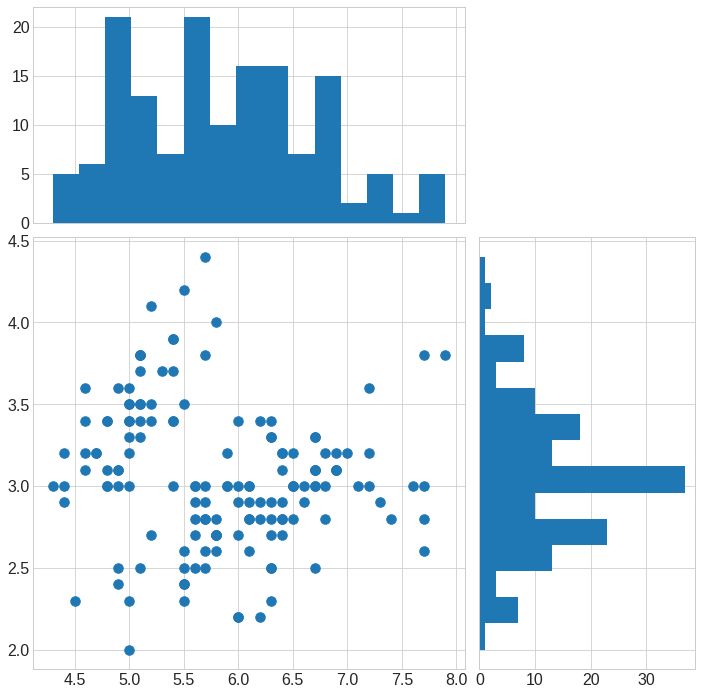

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,0.6,0.6])
ax1 = fig.add_axes([0.62,0,0.3,0.6], sharey=ax)
ax2 = fig.add_axes([0,0.62,0.6,0.3], sharex=ax)
ax.scatter(data[:,0], data[:,1], s=90)
ax1.hist(data[:,1], orientation='horizontal', bins=15, edgecolor='None')
ax1.tick_params(axis='y', labelleft=False)
ax2.hist(data[:,0], bins=15, edgecolor='None')
ax2.tick_params(axis='x', labelbottom=False)

### Bar plots

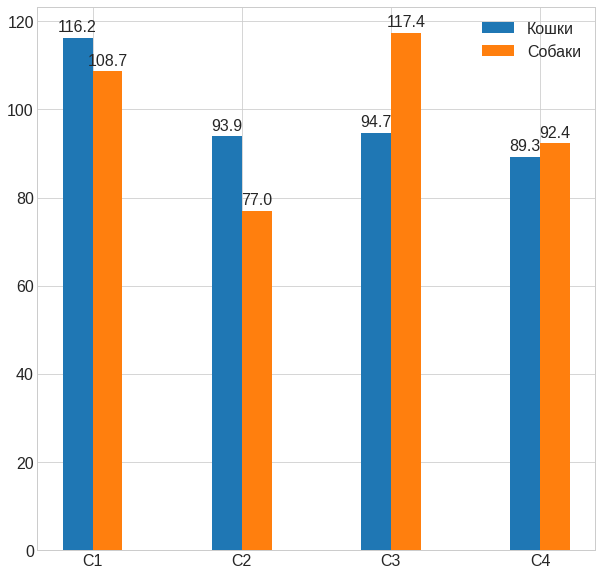

In [ ]:
np.random.seed(1)
# data
categories = ['C1', 'C2', 'C3', 'C4']
x = np.arange(len(categories))
cats = 100+10*np.random.randn(len(categories),)
dogs = 100+10*np.random.randn(len(categories),)

# plot
width=0.2
fig, ax = plt.subplots(figsize=(10,10))
cats_bars = ax.bar(x=x-width/2, height=cats, width=width, label='Кошки')
dogs_bars = ax.bar(x=x+width/2, height=dogs, width=width, label='Собаки')
ax.bar_label(cats_bars, padding=3, fmt='%.1f')
ax.bar_label(dogs_bars, padding=3, fmt='%.1f')
ax.legend()
ax.set_xticks(x, categories)

### Contour lines

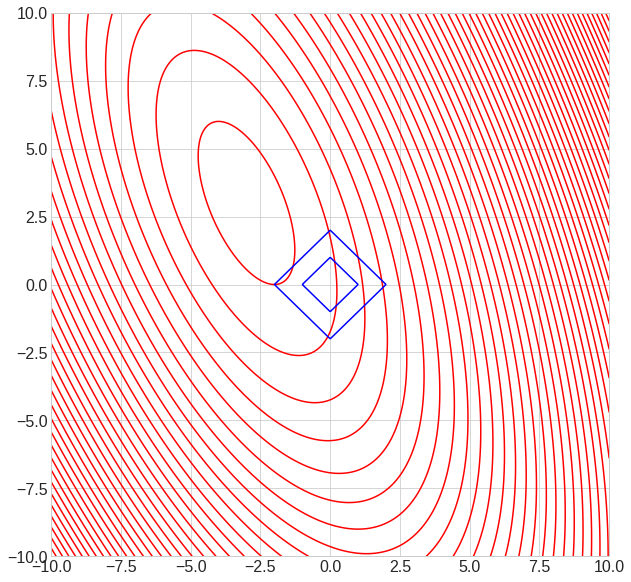

In [ ]:
# data
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
xg, yg = np.meshgrid(x,y, sparse=True)
z1 = 3*(xg + 2)**2 + yg**2 + 2*xg*yg
z2 = np.abs(xg) + np.abs(yg)

# plot
fig, ax = plt.subplots(figsize=(10,10))
ax.contour(x, y, z1, 50, colors='red')
ax.contour(x, y, z2, [1,2], colors='blue')

### References

<ul>
    <li><a href='https://matplotlib.org/stable/tutorials/index.html'>https://matplotlib.org/stable/tutorials/index.html</a></li>
    <li><a href='https://matplotlib.org/stable/gallery/'>https://matplotlib.org/stable/gallery/</a></li>
</ul>